# Apple App Store User Rating Prediction.

Basically, app ratings show how happy people are with the app. If it lives up to their expectations, they'll give it a good rating. But if it falls short, the rating goes down.  
In this research we will study what is the most defining features that lives up to the users expectations and provides him a great experience and affects the application rating on the store.  
*** 



In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Step 1: Reading and Understanding the Data

In [156]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
test2 = pd.read_csv("test.csv")

In [157]:
data.shape


(3715, 18)

In [158]:
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/combat-commander...,918293835,Combat Commander RSG,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,8,0.0,NaN,Generate Random Scenarios for Combat Commander...,Michael Kiefte,4+,EN,83041280,Games,"Games, Strategy, Utilities, Board",18/04/2015,26/01/2016,5.0
1,https://apps.apple.com/us/app/outbreak-zombie-...,507880615,Outbreak+ Zombie Escape Puzzle Fun Door Maze S...,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,20,0.0,NaN,Welcome to Outbreak+ The Zombie Escape Puzzle ...,"RoboNacho Systems, LLC",4+,EN,12134715,Games,"Games, Entertainment, Role Playing, Strategy",15/05/2012,2/05/2013,4.0
2,https://apps.apple.com/us/app/forklift-guy-lit...,429886090,Forklift Guy Lite,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,7,0.0,NaN,"""The Forklift Guy is an easy and funny strateg...",Navigation-Info Kft.,4+,EN,10205035,Games,"Games, Puzzle, Strategy",8/04/2011,8/04/2011,3.5
3,https://apps.apple.com/us/app/alien-shooter-td...,1132242499,Alien Shooter TD,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,119,0.0,"0.99, 4.99, 9.99, 10.99, 5.99, 24.99, 19.99, 2...",Be careful when downloading the game: you run ...,Sigma Team,17+,"EN, RU",328424448,Games,"Games, Strategy, Entertainment",7/09/2016,22/01/2019,4.5
4,https://apps.apple.com/us/app/ship-tycoon/id11...,1192606549,Ship Tycoon.,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,81,0.0,"2.99, 4.99, 9.99, 19.99, 49.99, 99.99","""A new game present by TRADEGAME Lab following...",TRADEGAME Lab Inc.,4+,"EN, DE, JA, KO, ZH, ES, ZH",235592704,Games,"Games, Strategy, Role Playing",25/05/2017,7/05/2019,3.5


In [159]:
test.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/03/2018,31/07/2019
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/04/2013,21/04/2015
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/02/2019


In [160]:
list(data.columns)

['URL',
 'ID',
 'Name',
 'Subtitle',
 'Icon URL',
 'User Rating Count',
 'Price',
 'In-app Purchases',
 'Description',
 'Developer',
 'Age Rating',
 'Languages',
 'Size',
 'Primary Genre',
 'Genres',
 'Original Release Date',
 'Current Version Release Date',
 'Average User Rating']

#### The Data's Columns:
- <b>URL</b>: The game link on the apple store.
- <b>ID</b>: Assigned ID.
- <b>Name</b>: App name.
- <b>Subtitle</b>: Secondary text under the name.
- <b>Icon URL</b>: Apps icon jpg.
- <b>User Rating Count</b>: Number of ratings internationally, null means it is below 5.
- <b>Price</b>: Price in USD.
- <b>In-app Purchases</b>: Prices of available in-app purchases.
- <b>Description</b>: Description of the app .
- <b>Developer</b>: The app maker.
- <b>Age Rating</b>: Age ratings that the app targets.
- <b>Languages</b>: Supported languages on the game.
- <b>Size</b>: The Size in bytes.
- <b>Primary Genre</b>: Main Genre.
- <b>Genres</b>: App Genres.
- <b>Original Release Date</b>: The date the app was published on the store.
- <b>Current Version Release Date</b>: The latest version update by the developer.
- <b>Average User Rating</b>: Rounded to nearest .5, requires at least 5 ratings.

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3715 entries, 0 to 3714
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           3715 non-null   object 
 1   ID                            3715 non-null   int64  
 2   Name                          3715 non-null   object 
 3   Subtitle                      1044 non-null   object 
 4   Icon URL                      3715 non-null   object 
 5   User Rating Count             3715 non-null   int64  
 6   Price                         3715 non-null   float64
 7   In-app Purchases              2290 non-null   object 
 8   Description                   3715 non-null   object 
 9   Developer                     3715 non-null   object 
 10  Age Rating                    3715 non-null   object 
 11  Languages                     3706 non-null   object 
 12  Size                          3715 non-null   int64  
 13  Pri

#### Dropping unnecessary columns

In [162]:
data.drop(['URL','ID','Icon URL'],axis=1,inplace=True)
test.drop(['URL','ID','Icon URL'],axis=1,inplace=True)

#### Checking missing values

In [163]:
data.isna().sum().sort_values(ascending=False)

Subtitle                        2671
In-app Purchases                1425
Languages                          9
Name                               0
User Rating Count                  0
Price                              0
Description                        0
Developer                          0
Age Rating                         0
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
Average User Rating                0
dtype: int64

In [164]:
test.isna().sum().sort_values(ascending=False)

Subtitle                        1078
In-app Purchases                 614
Languages                          2
Name                               0
User Rating Count                  0
Price                              0
Description                        0
Developer                          0
Age Rating                         0
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

#### Description of numberic data

In [165]:
data.describe()

,User Rating Count,Price,Size,Average User Rating
count,3.715000e+03,3715.000000,3.715000e+03,3715.000000
mean,4.161968e+03,0.581314,1.399048e+08,4.029475
std,5.811511e+04,2.794108,2.587529e+08,0.753027
min,5.000000e+00,0.000000,2.158400e+05,1.000000
25%,1.300000e+01,0.000000,2.783027e+07,3.500000
50%,4.900000e+01,0.000000,6.733005e+07,4.000000
75%,3.435000e+02,0.000000,1.593790e+08,4.500000
max,3.032734e+06,139.990000,3.916692e+09,5.000000


#### Taking a quick look on some columns of interest and modify some of them

##### `Subtitle` column

In [166]:
data['Subtitle'].dropna().head()

5              Create your own empire!
6     "Who's a pro firework launcher?"
11      Build an Empire, hex by hex...
14        Idle Oil Empire Clicker Game
16        Win Real Money Playing Cards
Name: Subtitle, dtype: object

The column does not contain any irrelevant data.  
conclusion most apps does not contain a subtitle or a subheader in the app store. 

##### `Average User Rating` column

In [167]:
data['Average User Rating'].value_counts().sort_values(ascending=False)

4.5    1407
4.0     869
3.5     463
5.0     418
3.0     277
2.5     164
2.0      78
1.5      31
1.0       8
Name: Average User Rating, dtype: int64

C:\Users\Divo\AppData\Local\Temp\ipykernel_13700\2537204031.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Average User Rating'],ax = ax[0])


<Axes: >

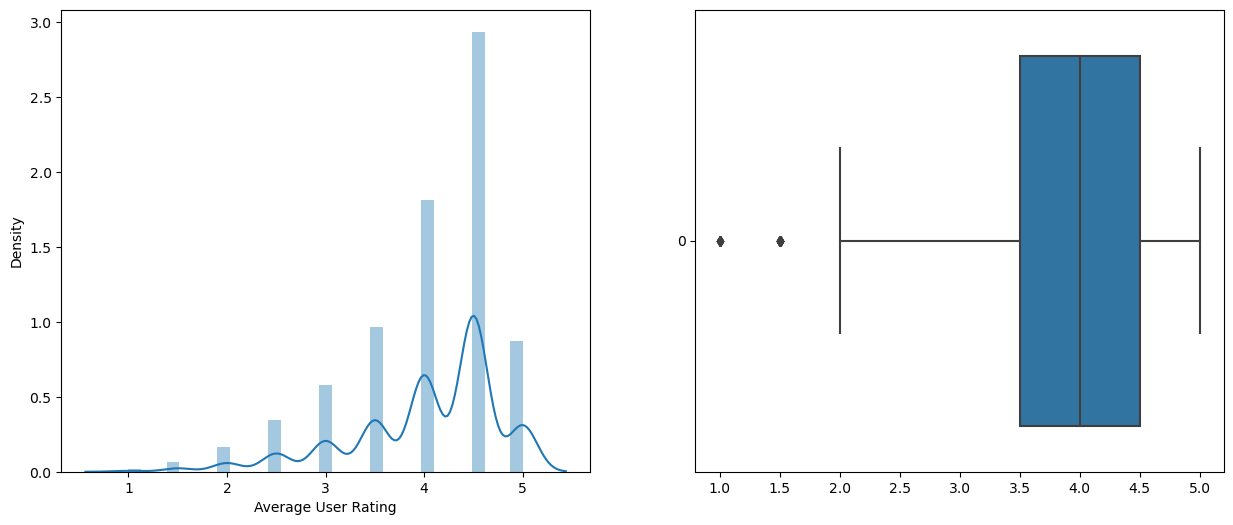

In [168]:
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.distplot(data['Average User Rating'],ax = ax[0])
sns.boxplot(data["Average User Rating"],orient='h')

the data is valid and there is no inconvenient values but the distribution is left skewed, from these plot we can conclude that a great chunk of the apps on the app store lived up to the users expectations and resulted in high user rating. 

##### `User Rating Count` column

In [169]:
data['User Rating Count'].sort_values(ascending=False).head()

3507    3032734
879     1277095
894      711409
1050     439776
1086     400787
Name: User Rating Count, dtype: int64

checking for outliers

C:\Users\Divo\AppData\Local\Temp\ipykernel_13700\741669570.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['User Rating Count'],ax = ax[0])


<Axes: >

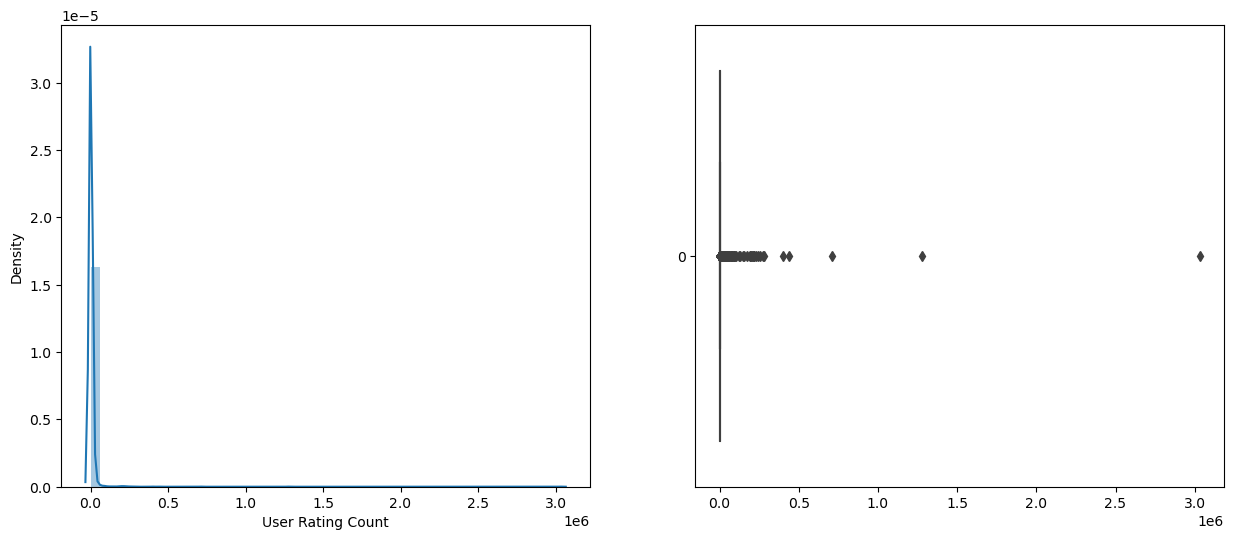

In [170]:
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.distplot(data['User Rating Count'],ax = ax[0])
sns.boxplot(data['User Rating Count'],ax=ax[1],orient='h')

There are some extreme values in the data but they are reasonable to exist, some app are famous world wide so they have high rating counts, lets not clean those outliers as they have no or little impact as thier number is little.

##### `Price` column

In [171]:
data['Price'].value_counts().sort_index()

0.00      3073
0.99       191
1.99       118
2.99       131
3.99        57
4.99        83
5.99        13
6.99         9
7.99         4
8.99         9
9.99        18
11.99        2
12.99        1
14.99        1
16.99        1
19.99        3
139.99       1
Name: Price, dtype: int64

C:\Users\Divo\AppData\Local\Temp\ipykernel_13700\4074405290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],ax = ax[0])


<Axes: >

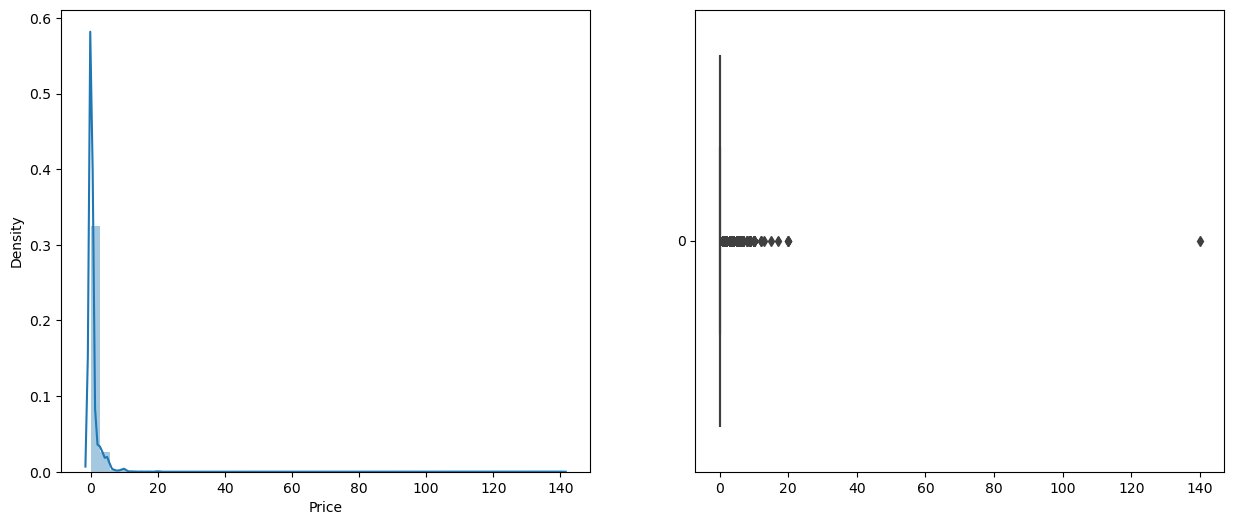

In [172]:
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.distplot(data['Price'],ax = ax[0])
sns.boxplot(data['Price'],ax=ax[1],orient='h')

Most apps on the store tend to be free and there are some apps that needs payment for purchase, but lets have a look at apps starting from 9.99 and above.  

In [173]:
expensive_apps = data[data['Price'] >= 9.99]

In [174]:
expensive_apps['Primary Genre'].value_counts().sort_values(ascending=False)

Games           24
Productivity     2
Finance          1
Name: Primary Genre, dtype: int64

Most of at least 9.99 USD apps are games but there are 3 apps that are not under the games genre, lets take a look at them.

In [175]:
expensive_apps[expensive_apps['Primary Genre'] != 'Games'].head()

,Name,Subtitle,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
145,Finabase: realtime stocks,Stock Market Trade Buy Invest,1099,139.99,"1.99, 9.99, 59.99",StockIdeal Pro is designed to bring you a stre...,Astontek Inc,4+,EN,133343232,Finance,"Finance, Simulation, Strategy, Games",30/09/2013,17/07/2019,4.5
1036,Design CAD - create and edit DWG/DXF/CTM drawi...,NaN,7,9.99,7.99,"""Design CAD is a full CAD application that let...",li xiaolong,4+,"CS, EN, FR, DE, HU, IT, JA, KO, PL, PT, RU, SK...",128368640,Productivity,"Productivity, Strategy, Role Playing, Games",8/06/2014,20/10/2015,1.0
1084,Project Management - for MS Project XML Schedule,NaN,5,9.99,7.99,Project Management is a Project Management app...,Rassulzhan Poltayev,4+,"NL, EN, FR, DE, IT, JA, PT, RU, ZH, ES",19391488,Productivity,"Productivity, Racing, Strategy, Games",14/11/2016,14/11/2016,2.0


The most expensive app in the data is a financial app whice explains why it is very expensive the other 2 app seem normal as they are the lowest in the expensive apps that we analyzed separately.  

Looks like we can categorize the prices into ranges.

##### `In-app Purchaces` column

Recalling that this column had null values, we can explain this situation with that most apps don't require In-app purchases so the null could mean this app does not have in app purchases so we can fill it with > 0.00.

In [176]:
# Splitting the comma separated values and putting them as a list of floats
data["In-app Purchases"] = data["In-app Purchases"].dropna().map(lambda x: list(float(i) for i in x.split(", ")))

test["In-app Purchases"] = test["In-app Purchases"].dropna().map(lambda x: list(float(i) for i in x.split(", ")))

# Filling the Nan values with zero because Nan means no In-app purchases
data["In-app Purchases"] = data["In-app Purchases"].fillna(0.00)

test["In-app Purchases"] = test["In-app Purchases"].fillna(0.00)

##### `Languages` column

We have seen before that the languages column had null values too, let see it again.

In [177]:
data['Languages'].isna().value_counts()

False    3706
True        9
Name: Languages, dtype: int64

We have 9 apps that we don't know their language, we can assume these apps are in english language as english is widely used languages world wide and the nulls are not alot in our data.

In [178]:
# splitting the Languages and storing the values as a list
data["Languages"] = data["Languages"].dropna().map(lambda x: x.split(", "))
test["Languages"] = test["Languages"].dropna().map(lambda x: x.split(", "))

# Filling the nulls with EN as for english values
data["Languages"] = data["Languages"].fillna("EN")
test["Languages"] = test["Languages"].fillna("EN")

##### `Size` column

We explain earlier that the `Size` column have extreme values for app sizes the only reasonable explanation for that is this is the size in bytes so we convert it to megabytes.

C:\Users\Divo\AppData\Local\Temp\ipykernel_13700\3343047123.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Size'],ax = ax[0])


<Axes: >

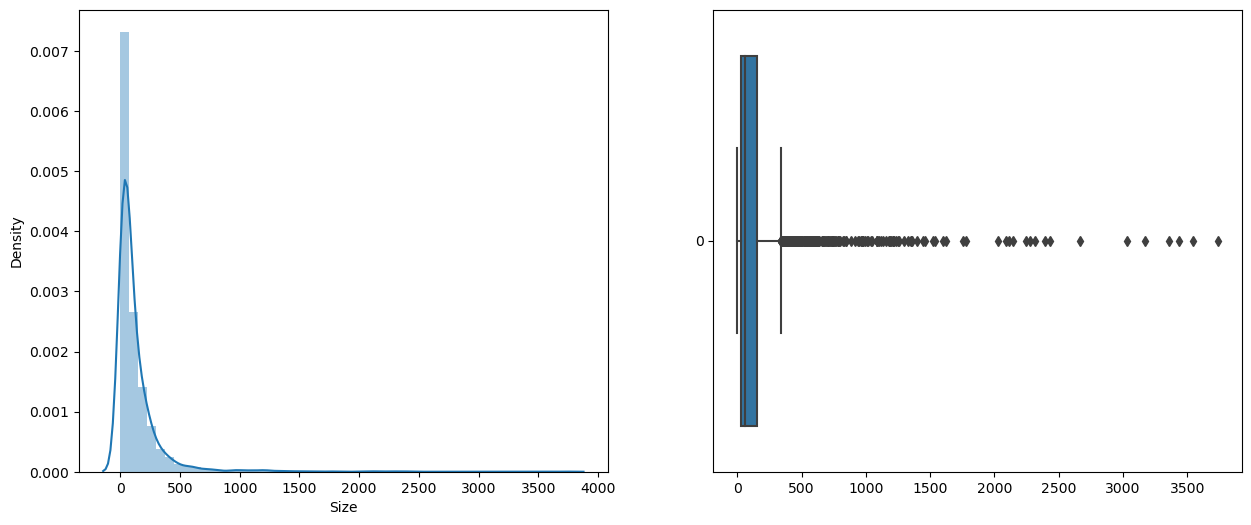

In [179]:
# Converting the Size to megabytes
data["Size"] = data["Size"].map(lambda x: round(x/(1024 * 1024), 2))
test["Size"] = test["Size"].map(lambda x: round(x/(1024 * 1024), 2))

# Viewing the distribution of the data
fig, ax = plt.subplots(1,2,figsize = (15,6))
sns.distplot(data['Size'],ax = ax[0])
sns.boxplot(data['Size'],ax=ax[1],orient='h')

What apps have this huge size in megabytes?  
Lets look into apps with sizes over 500 megabytes.


In [180]:
large_apps = data[data['Size'] > 500]

In [181]:
large_apps['Primary Genre'].value_counts().sort_values(ascending=False)

Games            140
Education          1
Entertainment      1
Name: Primary Genre, dtype: int64

It is reasonable for games to have high values, lets check the other to primary genres

In [182]:
large_apps[large_apps['Primary Genre'] != "Games"]

,Name,Subtitle,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
279,Teachley: Mt. Multiplis,Multiplication made fun,31,3.99,0.0,"""Winner of Editor's Choice Award - Children's ...",Teachley,4+,[EN],626.80,Education,"Education, Games, Strategy",21/05/2014,6/09/2018,4.0
2116,Sherlock: The Network HD,NaN,305,0.00,"[2.99, 0.99, 1.99, 1.99]",Five star top-selling app in over 30 countries...,The Project Factory AU,12+,[EN],571.85,Entertainment,"Entertainment, Puzzle, Strategy, Games",21/01/2014,11/01/2018,4.5


By looking at the two apps they contain "Games" in it's genres column which explains the large size of the app despite that it's primary genre is not game.

##### `Genres` column

In [183]:
# Splitting the string into a list once more
data['Genres'] = data['Genres'].map(lambda x : x.split(', '))
test['Genres'] = test['Genres'].map(lambda x : x.split(', '))

In [184]:
# Importing datatime before dealing with date columns
from datetime import datetime as dt

##### `Original Release Date` column

In [185]:
# To make sure every date is separated by a /
data['Original Release Date'] = data['Original Release Date'].apply(lambda x: str(x).replace('-','/'))
test['Original Release Date'] = test['Original Release Date'].apply(lambda x: str(x).replace('-','/'))
# Converting the column to date and time format
data["Original Release Date"] = data["Original Release Date"].apply(lambda date: dt.strptime(date, "%d/%m/%Y"))
test["Original Release Date"] = test["Original Release Date"].apply(lambda date: dt.strptime(date, "%d/%m/%Y"))

##### `Current Version Release Date` column

In [186]:
# To make sure every date is separated by a /
data['Current Version Release Date'] = data['Current Version Release Date'].apply(lambda x: str(x).replace('-','/'))
test['Current Version Release Date'] = test['Current Version Release Date'].apply(lambda x: str(x).replace('-','/'))
# Converting the column to date and time format
data["Current Version Release Date"] = data["Current Version Release Date"].apply(lambda date: dt.strptime(date, "%d/%m/%Y"))
test["Current Version Release Date"] = test["Current Version Release Date"].apply(lambda date: dt.strptime(date, "%d/%m/%Y"))

After taking a quick look on the columns of interest and modifying some of our features lets proceed to the next step and try to make some new features.

---

## Step 2: Feature Engineering

We can create 5 new features from our current data.

#### `Game Genre`
As most of our dataset is game let study this genre more as it represent a big part of every digital apps store strategy. 



In [187]:
# Getting the top most frequent game genres in our dataset
data['Game Genre'] = data[data['Primary Genre'] == "Games"]['Genres'].map(lambda x: x[1]) # second element in the list because the first is the primary genre
test['Game Genre'] = test[test['Primary Genre'] == "Games"]['Genres'].map(lambda x: x[1])
data['Game Genre'].head()

0         Strategy
1    Entertainment
2           Puzzle
3         Strategy
4         Strategy
Name: Game Genre, dtype: object

#### `Release Year` & `Release Month`
Such features can help in time-series analysis.

In [188]:
# Getting Year
data["Release Year"] = data["Original Release Date"].map(lambda x: x.strftime("%Y"))
test["Release Year"] = test["Original Release Date"].map(lambda x: x.strftime("%Y"))
# Getting Month
data["Release Month"] = data["Original Release Date"].map(lambda x: x.strftime("%m"))
test["Release Month"] = test["Original Release Date"].map(lambda x: x.strftime("%m"))

#### `Price Range`
While assigning apps to price ranges is straightforward, the specific ranges chosen can be subjective. To ensure consistency and objectivity, we should define clear criteria for classification.  

Free = 0.00  
Low Price -> 0.99 - 4.99  
Medium Price -> 5.99 - 19.99  
High Price > 19.99

In [189]:
# Defining a function to do our job for us
def classifyPrice(price):
    if price == 0.00:
        return "Free"
    elif price >= 0.99 and price <= 4.99:
        return "Low Price"
    elif price >= 5.99 and price <= 19.99:
        return "Medium Price"
    elif price >= 19.99 :
        return "High Price"
    
data['Price Range'] = data['Price'].apply(classifyPrice)
test['Price Range'] = test['Price'].apply(classifyPrice)
data['Price Range'].value_counts()

Free            3073
Low Price        580
Medium Price      61
High Price         1
Name: Price Range, dtype: int64

Only one app classified as high price.

#### `Total In-App Purchases`
To see if the overall price of in-app purchases affects the user rating or not.

In [191]:
data['In-app Purchases']

0                                                     0.0
1                                                     0.0
2                                                     0.0
3       [0.99, 4.99, 9.99, 10.99, 5.99, 24.99, 19.99, ...
4                 [2.99, 4.99, 9.99, 19.99, 49.99, 99.99]
                              ...                        
3710    [1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 2.99, 7.9...
3711    [2.99, 4.99, 1.99, 2.99, 5.99, 9.99, 11.99, 19...
3712                                                  0.0
3713    [9.99, 1.99, 4.99, 19.99, 4.99, 4.99, 4.99, 9....
3714         [0.99, 1.99, 0.99, 4.99, 9.99, 19.99, 49.99]
Name: In-app Purchases, Length: 3715, dtype: object

In [192]:
data['Total In-App Purchases'] = data['In-app Purchases'].map(lambda x : sum(x) if isinstance(x,list) else 0.00)
test['Total In-App Purchases'] = test['In-app Purchases'].map(lambda x : sum(x) if isinstance(x,list) else 0.00)
data['Total In-App Purchases'].head()

0      0.00
1      0.00
2      0.00
3    130.91
4    187.94
Name: Total In-App Purchases, dtype: float64

With those 4 new features by our side we can proceed to the next step with ease as they will help us understand the data more.

---

## Step 3: Exploratory Data Analysis
Lets ask some questions related to the data and let the data vizualizations answer them to us.

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3715 entries, 0 to 3714
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          3715 non-null   object        
 1   Subtitle                      1044 non-null   object        
 2   User Rating Count             3715 non-null   int64         
 3   Price                         3715 non-null   float64       
 4   In-app Purchases              3715 non-null   object        
 5   Description                   3715 non-null   object        
 6   Developer                     3715 non-null   object        
 7   Age Rating                    3715 non-null   object        
 8   Languages                     3715 non-null   object        
 9   Size                          3715 non-null   float64       
 10  Primary Genre                 3715 non-null   object        
 11  Genres                        

In [194]:
data.head()

,Name,Subtitle,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating,Game Genre,Release Year,Release Month,Price Range,Total In-App Purchases
0,Combat Commander RSG,NaN,8,0.0,0.0,Generate Random Scenarios for Combat Commander...,Michael Kiefte,4+,[EN],79.19,Games,"[Games, Strategy, Utilities, Board]",2015-04-18,2016-01-26,5.0,Strategy,2015,04,Free,0.00
1,Outbreak+ Zombie Escape Puzzle Fun Door Maze S...,NaN,20,0.0,0.0,Welcome to Outbreak+ The Zombie Escape Puzzle ...,"RoboNacho Systems, LLC",4+,[EN],11.57,Games,"[Games, Entertainment, Role Playing, Strategy]",2012-05-15,2013-05-02,4.0,Entertainment,2012,05,Free,0.00
2,Forklift Guy Lite,NaN,7,0.0,0.0,"""The Forklift Guy is an easy and funny strateg...",Navigation-Info Kft.,4+,[EN],9.73,Games,"[Games, Puzzle, Strategy]",2011-04-08,2011-04-08,3.5,Puzzle,2011,04,Free,0.00
3,Alien Shooter TD,NaN,119,0.0,"[0.99, 4.99, 9.99, 10.99, 5.99, 24.99, 19.99, ...",Be careful when downloading the game: you run ...,Sigma Team,17+,"[EN, RU]",313.21,Games,"[Games, Strategy, Entertainment]",2016-09-07,2019-01-22,4.5,Strategy,2016,09,Free,130.91
4,Ship Tycoon.,NaN,81,0.0,"[2.99, 4.99, 9.99, 19.99, 49.99, 99.99]","""A new game present by TRADEGAME Lab following...",TRADEGAME Lab Inc.,4+,"[EN, DE, JA, KO, ZH, ES, ZH]",224.68,Games,"[Games, Strategy, Role Playing]",2017-05-25,2019-05-07,3.5,Strategy,2017,05,Free,187.94


#### What are the top 10 primary genres on the store?

In [195]:
top_genres = data['Primary Genre'].value_counts().head(10).sort_values(ascending=False).index

Text(0.5, 1.0, 'Top 10 Genres on the App Store')

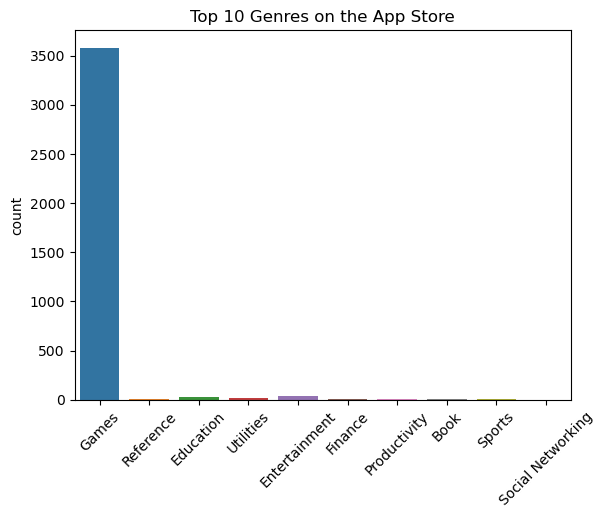

In [196]:
top10 = data[data['Primary Genre'].isin(top_genres)]['Primary Genre']

sns.countplot(data=top10,x=top10.values)
plt.xticks(rotation = 45)
plt.title("Top 10 Genres on the App Store")

* It is clear that Games is the top Primary Genre among others on the store.

#### What is the most popular subgenres on the store ?

In [197]:
from wordcloud import WordCloud

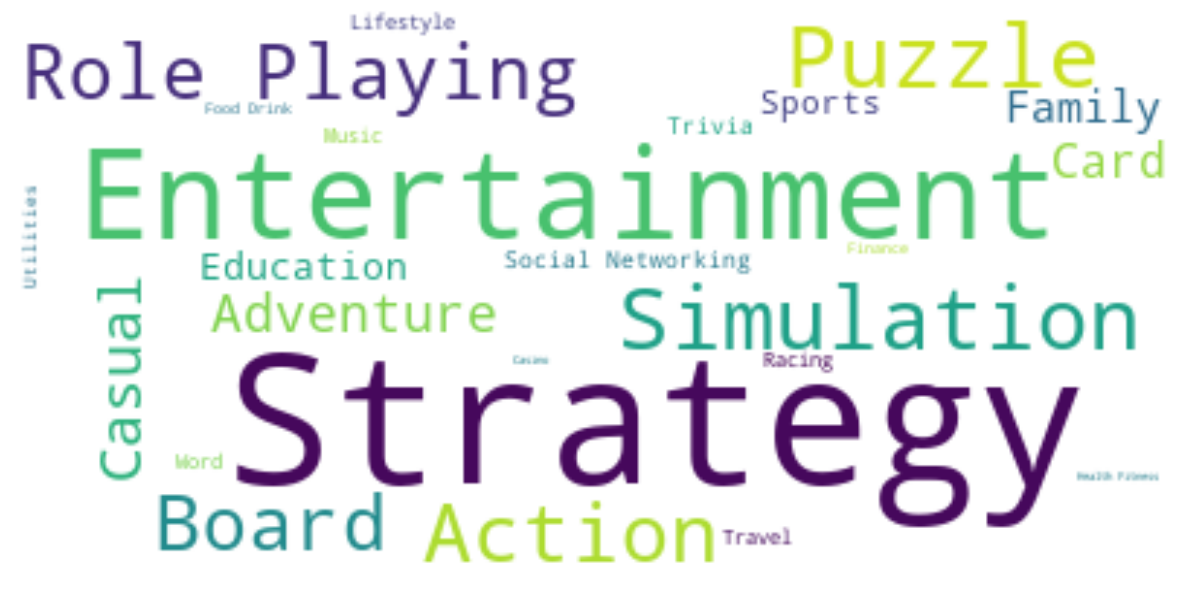

In [198]:
text = " ".join(str(genre) for genre in data['Game Genre'].dropna())
fig, ax = plt.subplots(1,1, figsize=(15,15))
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.show()

* Strategy, Entertainment, Simulation and Role Playing are the top 4 most popular genres.

#### What is the Highest and Lowest rated primary genres in our top 10 on average ? 

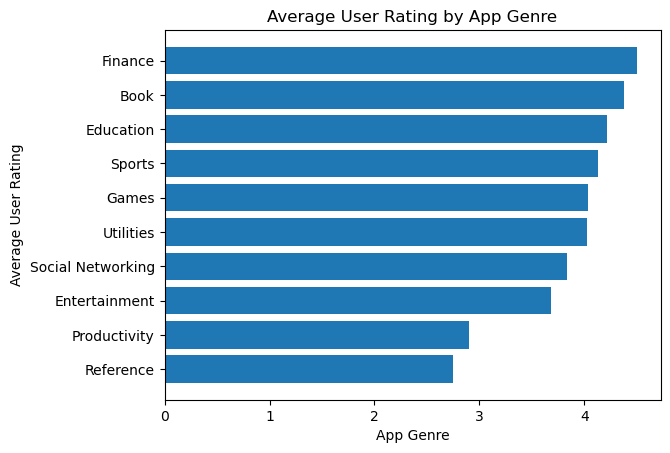

In [199]:
# Filter data by top genres
filtered_df = data[data['Primary Genre'].isin(top_genres)]  # Filter data by top genres
genre_groups = filtered_df.groupby('Primary Genre')['Average User Rating'].mean().sort_values()

plt.barh(genre_groups.index, genre_groups.values)
plt.xlabel('App Genre')
plt.ylabel('Average User Rating')
plt.xticks()
plt.title('Average User Rating by App Genre')
plt.show()

* Finance genre has the highest average of average user ratings.
* Reference genre has the lowest average of average uesr ratings.

#### What is the most common age rating for primary genre ?

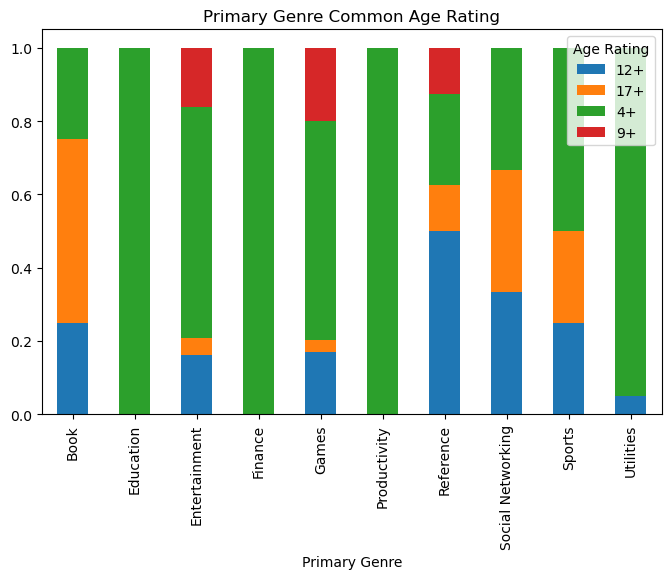

In [200]:
age_rating_genres = pd.crosstab(data[data["Primary Genre"].isin(top_genres)]["Primary Genre"], data["Age Rating"], normalize=0)
age_rating_genres.plot.bar(stacked=True, figsize=(8,5))
plt.title("Primary Genre Common Age Rating")
plt.show()

<b>Apple's App Store maintains four age ratings for application content, this rating system is only used by Apple</b>  

* As we can see 4+ age rating takes a high proportion of every top genre.
* 17+ has the least proportion of all the genres.
* Education, Finance and Productivity genres have only 4+ ratings eventhough they target adult audience.
* Book, Reference, Social Networking and Sports have more that 50% of their ratings varying between 12+ and 17+. 

#### Of all apps, what age rating have the highest proportion on the store ?

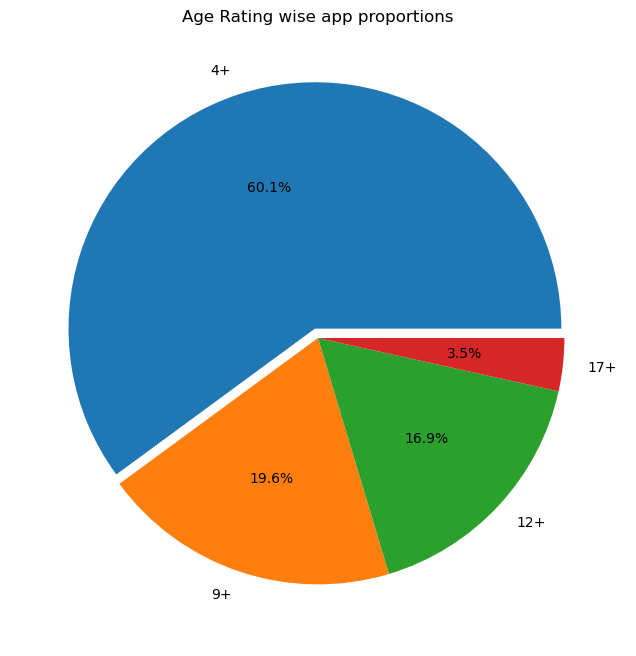

In [201]:
age_rating_counts = data["Age Rating"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_rating_counts, labels=age_rating_counts.index, autopct="%1.1f%%", explode=[0.04, 0, 0, 0])
plt.title("Age Rating wise app proportions")
plt.show()

* It appears that as the age rating increases the proportion of apps decreases.

#### What Price Ranges Have The Highest and Lowest Proportions on The Store ? 

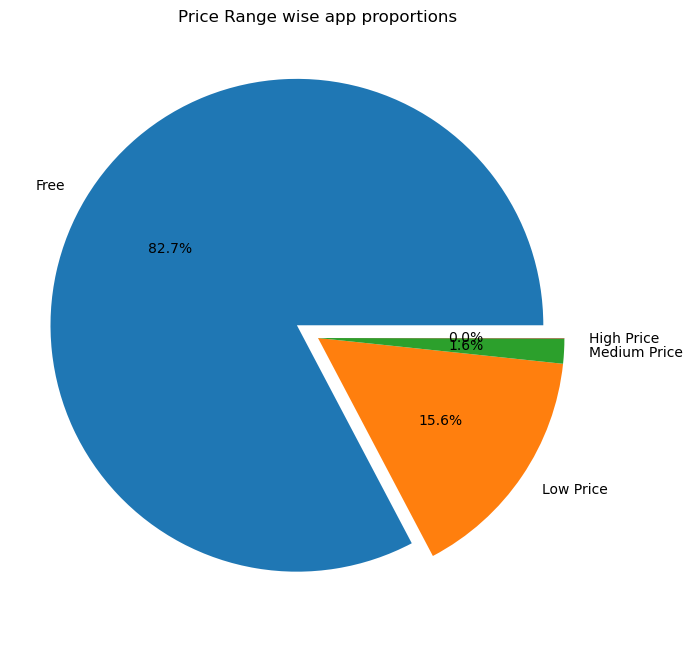

In [202]:
price_ranges_porportsions = data['Price Range'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(price_ranges_porportsions, labels=price_ranges_porportsions.index, autopct="%1.1f%%", explode=[0.1, 0, 0, 0])
plt.title("Price Range wise app proportions")
plt.show()

* With free games taking 82.7% of the App store 15.6% Low Price apps and Medium and High Price have very low to non existing proportions with 1.6% and 0.0%.  
(Recall that there is only 1 game classified as High Price)

#### What is the average size of our top genres ?

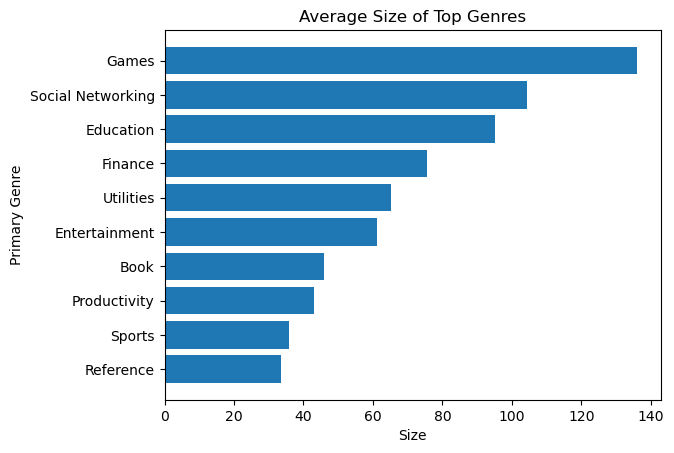

In [203]:
filtered_df = data[data["Primary Genre"].isin(top_genres)]

genre_groups = filtered_df.groupby('Primary Genre')['Size'].mean().sort_values()

plt.barh(genre_groups.index, genre_groups.values)
plt.xlabel('Size')
plt.ylabel('Primary Genre')
plt.xticks()
plt.title('Average Size of Top Genres')
plt.show()

* Games genre has the highest average size about 135 MB.
* Reference genre has the lowest with average size about 35 MB.

#### Does the price range affect the User Rating ?

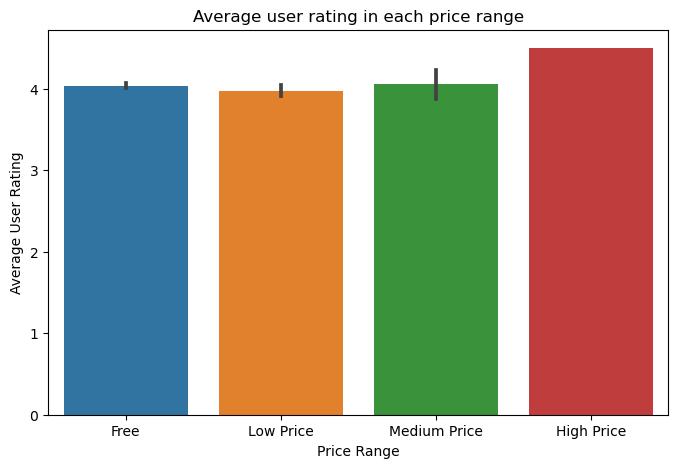

In [204]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x="Price Range", y="Average User Rating")
plt.title("Average user rating in each price range")
plt.show()

#### Time Series Analysis

- How many apps release each year?
- How many apps release each month?

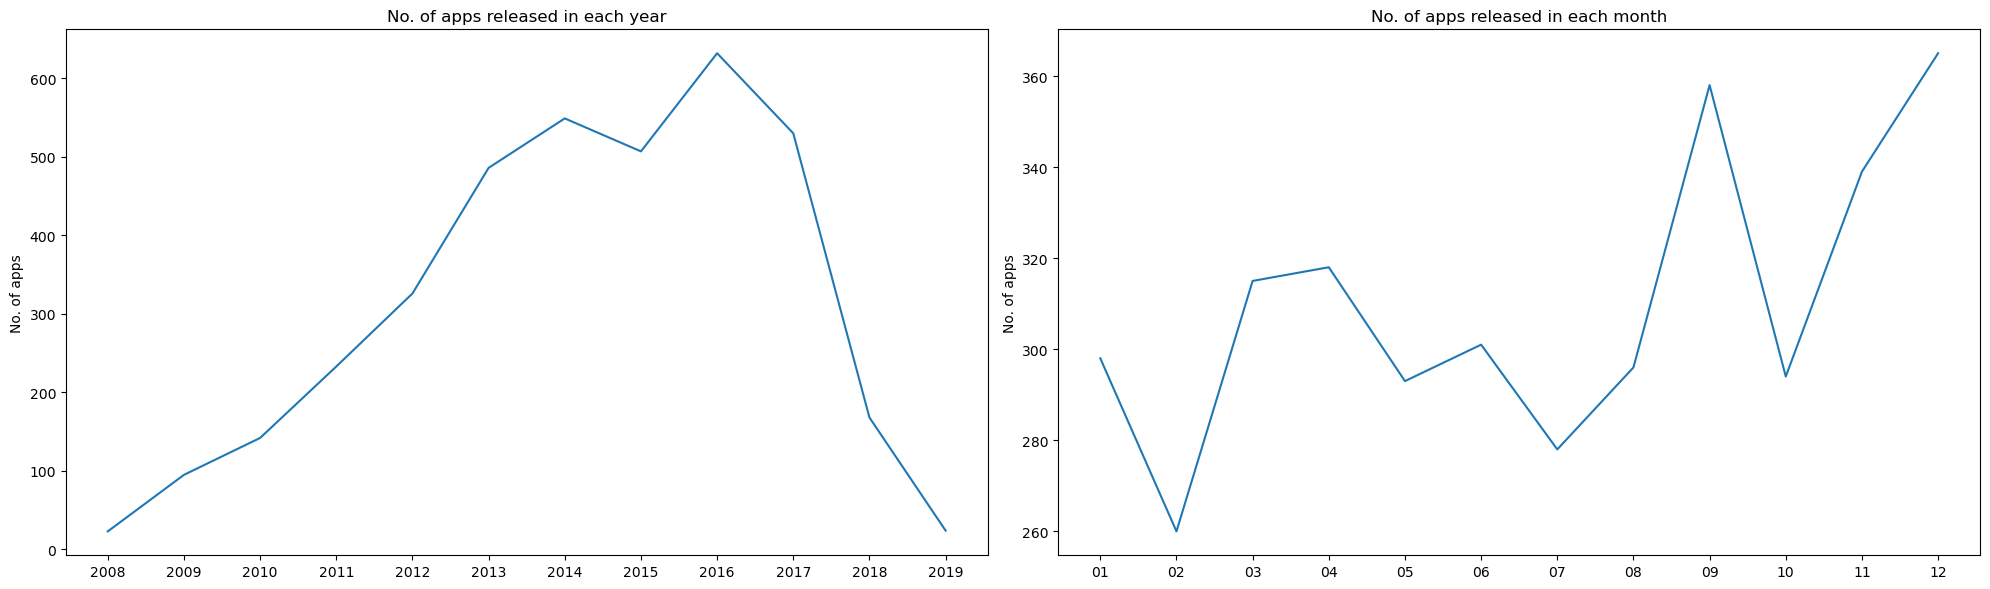

In [205]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# fig 1
release_year_counts = data.groupby("Release Year")["Name"].agg("count")
ax1.plot(release_year_counts.index, release_year_counts.values)

# fig 2
release_month_counts = data.groupby("Release Month")["Name"].agg("count")
ax2.plot(release_month_counts.index, release_month_counts.values)


ax1.set_ylabel("No. of apps")
ax1.set_title("No. of apps released in each year")

ax2.set_ylabel("No. of apps")
ax2.set_title("No. of apps released in each month")


plt.tight_layout()
plt.show()

* The number of apps released exhibited a continuous growth trend until 2016, reaching a peak in that year before experiencing a decline in subsequent years.
* September observed the highest number of app releases compared to other months.

#### Correlation Analysis  
How does our numeric data relate to our target variable.

C:\Users\Divo\AppData\Local\Temp\ipykernel_13700\3959864295.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_ordered.corr(method='pearson')


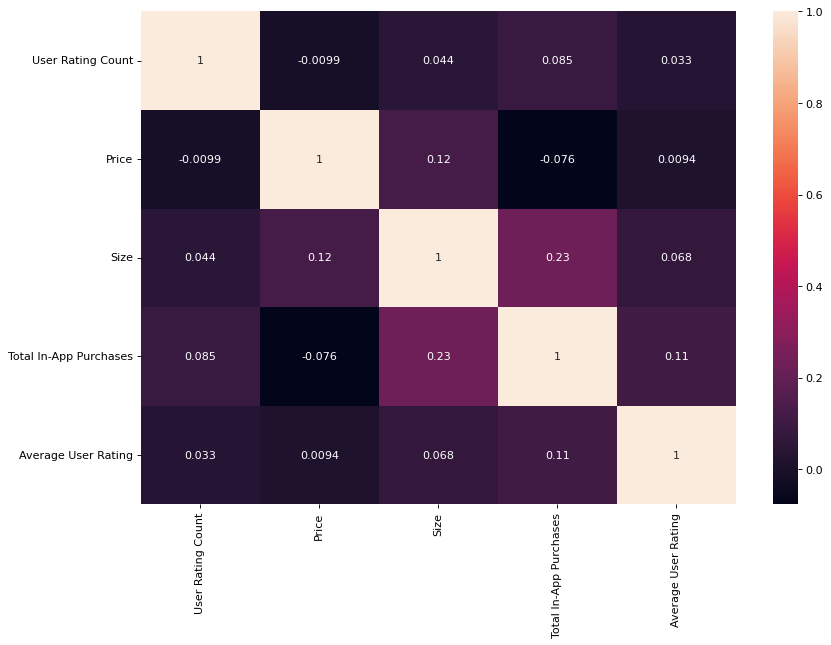

In [206]:
target = 'Average User Rating'
data_ordered = pd.concat([data.drop(target,axis=1), data[target]],axis=1)
corr = data_ordered.corr(method='pearson')

plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr,  annot=True)
plt.show()

----

## Step 4: Premodelling Phase  
Getting the data ready before feeding it to our models.

To make use of our languages column we can make one additional feature that can help us more and be more meaningful to the model.

In [207]:
data['Languages Support'] = data['Languages'].map(lambda x : 0 if len(x) == 1 else  1)
test['Languages Support'] = test['Languages'].map(lambda x : 0 if len(x) == 1 else  1)

In [208]:
# Making use of the dates by converting them from string to numbers
data['Release Month'] = pd.to_numeric(data['Release Month'])
data['Release Year'] = pd.to_numeric(data['Release Year'])


test['Release Month'] = pd.to_numeric(data['Release Month'])
test['Release Year'] = pd.to_numeric(data['Release Year'])


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3715 entries, 0 to 3714
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          3715 non-null   object        
 1   Subtitle                      1044 non-null   object        
 2   User Rating Count             3715 non-null   int64         
 3   Price                         3715 non-null   float64       
 4   In-app Purchases              3715 non-null   object        
 5   Description                   3715 non-null   object        
 6   Developer                     3715 non-null   object        
 7   Age Rating                    3715 non-null   object        
 8   Languages                     3715 non-null   object        
 9   Size                          3715 non-null   float64       
 10  Primary Genre                 3715 non-null   object        
 11  Genres                        

In [210]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Name                          1499 non-null   object        
 1   Subtitle                      421 non-null    object        
 2   User Rating Count             1499 non-null   int64         
 3   Price                         1499 non-null   float64       
 4   In-app Purchases              1499 non-null   object        
 5   Description                   1499 non-null   object        
 6   Developer                     1499 non-null   object        
 7   Age Rating                    1499 non-null   object        
 8   Languages                     1499 non-null   object        
 9   Size                          1499 non-null   float64       
 10  Primary Genre                 1499 non-null   object        
 11  Genres                        

Features to take : [User Rating Count ,Price,Developer, Age Rating, Size, Primary Genre, Release Year, Release Month,Price Range,Total In-App Purchases,Languages Support]


In [211]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder

In [212]:
# features to drop
drop = ['Name','Subtitle','In-app Purchases','Description','Languages','Genres','Original Release Date','Current Version Release Date','Game Genre']

In [213]:
train = data.drop(drop,axis = 1)
test.drop(drop,axis=1,inplace = True)

In [214]:
# Encoding ordinal data
le = LabelEncoder()

train['Age Rating'] = le.fit_transform(train['Age Rating'])
test['Age Rating'] = le.transform(test['Age Rating'])


train['Price Range'] = le.fit_transform(train['Price Range'])
test['Price Range'] = le.transform(test['Price Range'])

In [215]:
# Using Target Encoding For developer and primary genre columns
target_map_developer = train.groupby('Developer')['Average User Rating'].mean()
train['Developer Encoded'] = train['Developer'].map(target_map_developer)

target_map_Primary_Genre = train.groupby('Primary Genre')['Average User Rating'].mean()
train['Primary Genre Encoded'] = train['Primary Genre'].map(target_map_Primary_Genre)

In [216]:
train.head()

,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Average User Rating,Release Year,Release Month,Price Range,Total In-App Purchases,Languages Support,Developer Encoded,Primary Genre Encoded
0,8,0.0,Michael Kiefte,2,79.19,Games,5.0,2015,4,0,0.00,0,5.000000,4.035066
1,20,0.0,"RoboNacho Systems, LLC",2,11.57,Games,4.0,2012,5,0,0.00,0,4.000000,4.035066
2,7,0.0,Navigation-Info Kft.,2,9.73,Games,3.5,2011,4,0,0.00,0,3.750000,4.035066
3,119,0.0,Sigma Team,1,313.21,Games,4.5,2016,9,0,130.91,1,4.500000,4.035066
4,81,0.0,TRADEGAME Lab Inc.,2,224.68,Games,3.5,2017,5,0,187.94,1,3.857143,4.035066


In [217]:
# Using Target Encoding For developer and primary genre columns
target_map_developer = train.groupby('Developer')['Average User Rating'].mean()
test['Developer Encoded'] = test['Developer'].map(target_map_developer)

target_map_Primary_Genre = train.groupby('Primary Genre')['Average User Rating'].mean()
test['Primary Genre Encoded'] = test['Primary Genre'].map(target_map_Primary_Genre)

In [218]:
test.head()

,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre,Release Year,Release Month,Price Range,Total In-App Purchases,Languages Support,Developer Encoded,Primary Genre Encoded
0,982,0.00,GAMEVIL Inc.,0,853.05,Games,2015,4,0,307.84,1,4.50,4.035066
1,19,0.00,Auroch Digital Ltd,0,111.01,Games,2012,5,0,0.00,0,3.00,4.035066
2,14,0.00,Chen Zhong Yuan,2,48.30,Games,2011,4,0,0.00,1,3.75,4.035066
3,88,1.99,"GG Wizards, LLC",3,26.82,Games,2016,9,2,0.00,0,NaN,4.035066
4,13,3.99,Luis Regueira,0,38.07,Games,2017,5,2,0.00,0,NaN,4.035066


In [219]:
# Dropping the columns after replacing them
drop_dev_gen = ['Developer','Primary Genre']

In [220]:
train = train.drop(drop_dev_gen,axis = 1)
test.drop(drop_dev_gen,axis=1,inplace = True)

In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3715 entries, 0 to 3714
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User Rating Count       3715 non-null   int64  
 1   Price                   3715 non-null   float64
 2   Age Rating              3715 non-null   int32  
 3   Size                    3715 non-null   float64
 4   Average User Rating     3715 non-null   float64
 5   Release Year            3715 non-null   int64  
 6   Release Month           3715 non-null   int64  
 7   Price Range             3715 non-null   int32  
 8   Total In-App Purchases  3715 non-null   float64
 9   Languages Support       3715 non-null   int64  
 10  Developer Encoded       3715 non-null   float64
 11  Primary Genre Encoded   3715 non-null   float64
dtypes: float64(6), int32(2), int64(4)
memory usage: 319.4 KB


In [222]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   User Rating Count       1499 non-null   int64  
 1   Price                   1499 non-null   float64
 2   Age Rating              1499 non-null   int32  
 3   Size                    1499 non-null   float64
 4   Release Year            1499 non-null   int64  
 5   Release Month           1499 non-null   int64  
 6   Price Range             1499 non-null   int32  
 7   Total In-App Purchases  1499 non-null   float64
 8   Languages Support       1499 non-null   int64  
 9   Developer Encoded       733 non-null    float64
 10  Primary Genre Encoded   1496 non-null   float64
dtypes: float64(5), int32(2), int64(4)
memory usage: 117.2 KB


In [223]:
# Replacing the nulls in the test data with the mean
dev_mean = test['Developer Encoded'].mean()
test['Developer Encoded'] = test['Developer Encoded'].fillna(dev_mean)

pgen_mean = test['Primary Genre Encoded'].mean()
test['Primary Genre Encoded'] = test['Primary Genre Encoded'].fillna(pgen_mean)

In [224]:
X_train = train.iloc[:,[0,1,2,3,5,6,7,8,9,10,11]].values
y_train = train.iloc[:,4].values

In [225]:
X_test = test.iloc[:,:].values

In [226]:
X_train

array([[  8.        ,   0.        ,   2.        , ...,   0.        ,
          5.        ,   4.03506566],
       [ 20.        ,   0.        ,   2.        , ...,   0.        ,
          4.        ,   4.03506566],
       [  7.        ,   0.        ,   2.        , ...,   0.        ,
          3.75      ,   4.03506566],
       ...,
       [ 12.        ,   0.        ,   2.        , ...,   0.        ,
          5.        ,   4.025     ],
       [578.        ,   0.        ,   3.        , ...,   0.        ,
          4.25      ,   4.03506566],
       [782.        ,   0.        ,   2.        , ...,   0.        ,
          3.5       ,   4.03506566]])

In [227]:
y_train

array([5. , 4. , 3.5, ..., 5. , 4. , 3.5])

In [228]:
y_train = le.fit_transform(y_train)
y_train

array([8, 6, 5, ..., 8, 6, 5], dtype=int64)

In [229]:
sc = StandardScaler()
X_train[:, [0,1,3,4,5,7]] = sc.fit_transform(X_train[:,[0,1,3,4,5,7]])
X_test[:, [0,1,3,4,5,7]] = sc.transform(X_test[:,[0,1,3,4,5,7]])

----

## Step 5: Building the Model

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#### `Logistic Regression`

In [231]:
model = LogisticRegression()

In [232]:
# Fitting the model
model.fit(X_train,y_train)

c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
# Makking Prediction
y_pred = model.predict(X_test)

In [234]:
y_pred = le.inverse_transform(y_pred)
y_pred

array([4.5, 3. , 4. , ..., 4. , 4. , 4. ])

In [235]:
predictions = pd.DataFrame({'ID':range(1,1500),'Rating': y_pred})
predictions.to_csv('predictions.csv', index=False)

#### `K-Nearest Neighbors`

In [236]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
# Makking Prediction
y_pred_knn = knn.predict(X_test)
y_pred_knn = le.inverse_transform(y_pred_knn)
y_pred_knn

array([4. , 3.5, 3. , ..., 3.5, 4. , 4.5])

In [237]:
predictionsKnn = pd.DataFrame({'ID':range(1,1500),'Rating': y_pred_knn})
predictionsKnn.to_csv('predictionsKnn.csv', index=False)

#### `XGBoost Classifier`

In [238]:
# Making the model
xgbc = XGBClassifier()

xgbc.fit(X_train,y_train)
# Makking Prediction
y_pred_xgbc = xgbc.predict(X_test)
y_pred_xgbc = le.inverse_transform(y_pred_xgbc)
y_pred_xgbc

array([4.5, 3. , 3. , ..., 4. , 4. , 4. ])

In [239]:
predictionsxgbc = pd.DataFrame({'ID':range(1,1500),'Rating': y_pred_xgbc})
predictionsxgbc.to_csv('predictionsxgbc.csv', index=False)

#### `Support Vector Machine`

In [240]:
svc = SVC(kernel='rbf',C=1.0)

svc.fit(X_train,y_train)

# Making prediction
y_pred_svm = svc.predict(X_test)
y_pred_svm = le.inverse_transform(y_pred_svm)
y_pred_svm

array([4.5, 3. , 3.5, ..., 4. , 4. , 4. ])

In [241]:
predictionssvm = pd.DataFrame({'ID':range(1,1500),'Rating': y_pred_svm})
predictionssvm.to_csv('predictionssvm.csv', index=False)